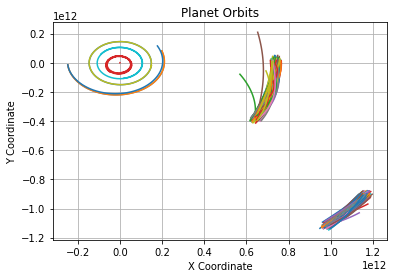

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

# Directory where the data files are located
data_directory = "createdData"

# Get a list of all .txt files in the directory
data_files = glob.glob(os.path.join(data_directory, "*.txt"))

# Extract planet names from file names
planets_to_load = [os.path.splitext(os.path.basename(file))[0] for file in data_files]

# Create a plot
plt.figure()

# Iterate through each planet and plot its data
for planet in planets_to_load:
    #print(planet)
    data = np.genfromtxt(os.path.join(data_directory, planet + ".txt"), delimiter=',', usecols=(1, 2), names=["x", "y"])
    plt.plot(data["x"], data["y"], label=planet)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Planet Orbits")
plt.grid(True)
#plt.legend()

# Save the plot as an SVG file
plt.savefig("planet_orbits.svg", format="svg")

plt.show()
